In [5]:
import s3fs
import pyarrow as pa
import pyarrow.dataset as ds

import sys
import os

import pyspark
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql import Window

import pandas as pd
import polars as pl
import altair as alt
import matplotlib.pyplot as plt

import geopandas as gpd


In [6]:
spark = SparkSession.builder.remote("sc://vlenpmod302spk3.hevs.ch:15002").getOrCreate()

In [13]:
df=spark.read.parquet("hdfs://vlenpmod302spk1.hevs.ch:9000/mod302/nyc-taxi.parquet")
df.show(2)

+---------+-------------------+-------------------+---------------+-------------+----------------+---------------+------------+------------------+-----------------+----------------+------------+-----------+-----+-------+----------+------------+------------+---------------------+------------------+-------------------+--------------------+----+-----+---+
|vendor_id|          pickup_at|         dropoff_at|passenger_count|trip_distance|pickup_longitude|pickup_latitude|rate_code_id|store_and_fwd_flag|dropoff_longitude|dropoff_latitude|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|total_amount|improvement_surcharge|pickup_location_id|dropoff_location_id|congestion_surcharge|year|month|day|
+---------+-------------------+-------------------+---------------+-------------+----------------+---------------+------------+------------------+-----------------+----------------+------------+-----------+-----+-------+----------+------------+------------+---------------------+-----------

In [9]:
df_smol = df.filter((df.month == 1) & (df.year == 2010) & (df.day == 21)).take(100)

In [10]:
df_smol

[Row(vendor_id='CMT', pickup_at=datetime.datetime(2010, 1, 21, 20, 13, 5), dropoff_at=datetime.datetime(2010, 1, 21, 20, 18, 48), passenger_count=3, trip_distance=1.2000000476837158, pickup_longitude=-73.95716094970703, pickup_latitude=40.777442932128906, rate_code_id='1', store_and_fwd_flag='0', dropoff_longitude=-73.96947479248047, dropoff_latitude=40.7645378112793, payment_type='Cas', fare_amount=5.699999809265137, extra=0.5, mta_tax=0.5, tip_amount=0.0, tolls_amount=0.0, total_amount=6.699999809265137, improvement_surcharge=None, pickup_location_id=None, dropoff_location_id=None, congestion_surcharge=None, year=2010, month=1, day=21),
 Row(vendor_id='DDS', pickup_at=datetime.datetime(2010, 1, 21, 19, 48, 8), dropoff_at=datetime.datetime(2010, 1, 21, 20, 28, 11), passenger_count=2, trip_distance=13.5, pickup_longitude=0.0, pickup_latitude=0.0, rate_code_id='1', store_and_fwd_flag=None, dropoff_longitude=0.0, dropoff_latitude=0.0, payment_type='CAS', fare_amount=30.5, extra=1.0, mta_

Geo json source:
https://github.com/codeforgermany/click_that_hood/blob/main/public/data/new-york-city-boroughs.geojson

In [14]:
df_places = gpd.read_file('new-york-city-boroughs.geojson')

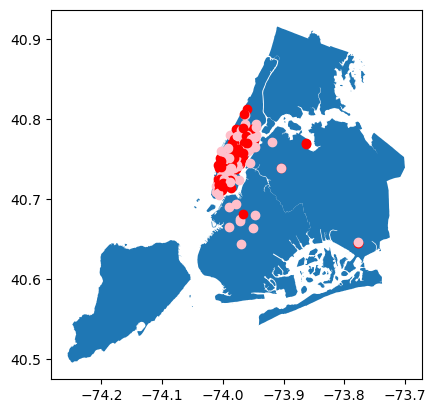

In [12]:
geo_axes = df_places.plot()
for i in df_smol:
    if i["pickup_longitude"] != 0 and i["pickup_latitude"] != 0:
        geo_axes.scatter([i["pickup_longitude"]], [i["pickup_latitude"]], c='red')
        geo_axes.scatter([i["dropoff_longitude"]], [i["dropoff_latitude"]], c='pink')